# Main Library

In [1]:
# Reading Image And Visualization
import os
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

# Make Preprocessing
import cv2
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Make Model
import tensorflow as tf
import tensorflow.keras as k

# Dowload Model
import pickle

In [2]:
# Loading Data
path_image = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Face Mask Detection Dataset"

data_list = os.listdir(path_image)

image_data = []

for file in data_list:
    image_list = os.listdir(path_image+ "/" + file)
    print("Loading image -{}" .format(file))
    for image in image_list:
        image_input = cv2.imread(path_image+"/"+ file +"/"+ image)
        image_input_new = cv2.resize(image_input, (200, 200))
        image_data.append(image_input_new)

Loading image -without_mask
Loading image -with_mask


In [3]:
len(image_data), data_list

(7553, ['without_mask', 'with_mask'])

In [4]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

print(data.shape)

(7553, 200, 200, 3)


In [5]:
data[0]

array([[[0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       [[0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       [[0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        [0.972549  , 0.972549  , 0.972549  ],
        ...,
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       ...,

       [[0.14117648, 0.14117648, 0.14117648],
        [0.14901961, 0.14901961, 0.14901961],
        [0.16862746, 0

In [17]:
num_class = len(data_list)
num_sample = data.shape[0]
label = np.ones((num_sample, ), dtype="int64")


label[0:3827] = 0 # without Mask 
label[3828:] = 1  # with Mask

name_label = data_list
image_label =  np_utils.to_categorical(label, num_class)

In [37]:
x_img, y_img = shuffle(data, image_label, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.7, random_state=42)

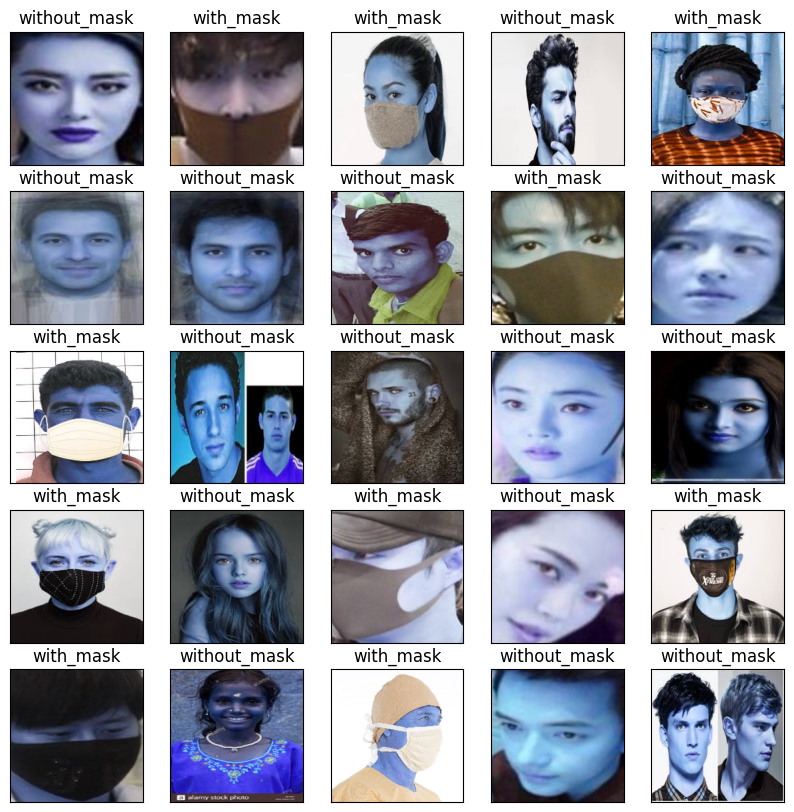

In [43]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(name_label[np.argmax(y_train[i])])

In [46]:
x_train.shape,y_train.shape

((5287, 200, 200, 3), (5287, 2))

## Building Model ==> CNN Model

In [52]:
model_mask = k.models.Sequential()

model_mask.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(200, 200, 3), padding="same"))
model_mask.add(k.layers.AveragePooling2D((2, 2)))

model_mask.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
model_mask.add(k.layers.AveragePooling2D((2, 2)))


model_mask.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model_mask.add(k.layers.AveragePooling2D((2, 2)))

model_mask.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model_mask.add(k.layers.MaxPool2D((2, 2)))

model_mask.add(k.layers.Flatten())

model_mask.add(k.layers.Dense(128, activation="relu"))
model_mask.add(k.layers.Dropout(0.2))

model_mask.add(k.layers.Dense(32, activation="relu"))
model_mask.add(k.layers.Dropout(0.2))

model_mask.add(k.layers.Dense(2, activation="softmax"))

model_mask.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model_mask.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 16)      1216      
                                                                 
 average_pooling2d_9 (Avera  (None, 100, 100, 16)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 32)      8224      
                                                                 
 average_pooling2d_10 (Aver  (None, 50, 50, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 average_pooling2d_11 (Aver  (None, 25, 25, 64)       

In [54]:
history = model_mask.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
166/166 [==============================] - 82s 493ms/step - loss: 0.2851 - accuracy: 0.8835 - val_loss: 0.2656 - val_accuracy: 0.9073
Epoch 2/10
166/166 [==============================] - 80s 482ms/step - loss: 0.2411 - accuracy: 0.9073 - val_loss: 0.2064 - val_accuracy: 0.9214
Epoch 3/10
166/166 [==============================] - 82s 496ms/step - loss: 0.2027 - accuracy: 0.9243 - val_loss: 0.1899 - val_accuracy: 0.9316
Epoch 4/10
166/166 [==============================] - 86s 521ms/step - loss: 0.1751 - accuracy: 0.9340 - val_loss: 0.1827 - val_accuracy: 0.9338
Epoch 5/10
166/166 [==============================] - 81s 486ms/step - loss: 0.1345 - accuracy: 0.9514 - val_loss: 0.1664 - val_accuracy: 0.9475
Epoch 6/10
166/166 [==============================] - 81s 489ms/step - loss: 0.1313 - accuracy: 0.9531 - val_loss: 0.1453 - val_accuracy: 0.9568
Epoch 7/10
166/166 [==============================] - 83s 499ms/step - loss: 0.1008 - accuracy: 0.9641 - val_loss: 0.1827 - val_ac

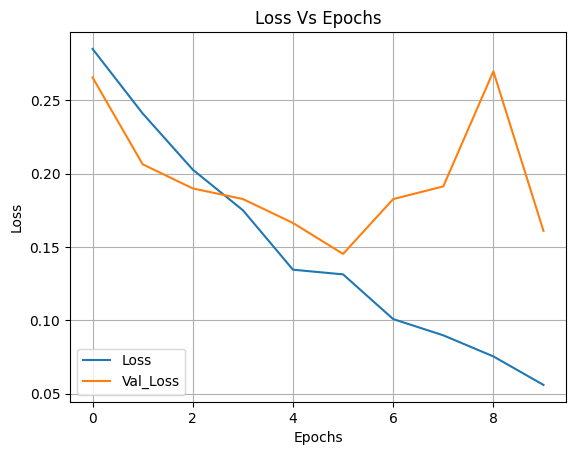

In [55]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

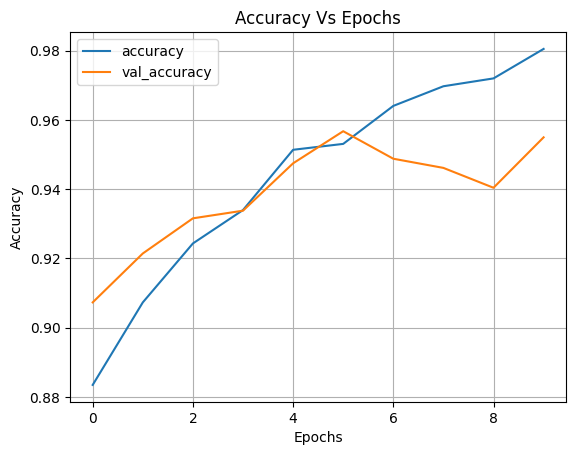

In [56]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [57]:
loss, accuracy = model_mask.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

71/71 [==============================] - 6s 78ms/step - loss: 0.1610 - accuracy: 0.9550
The Accuracy Testing Data is ==> 0.9549867510795593 %
The loss Testing Data is ==> 0.16095459461212158


### ==========================================================================
### ==========================================================================
### ==========================================================================
### ==========================================================================

## System Prediction

D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Face Mask Detection Dataset\with_mask\with_mask_288.jpg
1/1 [==============================] - 0s 19ms/step
The Prediction is ==>  with_mask


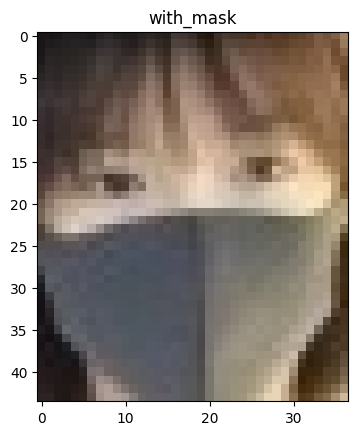

In [121]:
path_img = input()
image = cv2.imread(path_img)
image_pre_new = cv2.resize(image, (200, 200))
image_pre_new = np.reshape(image_pre_new, [1, 200, 200, 3])
prediction = model_mask.predict(image_pre_new)


# print(prediction)
new_prediction = name_label[np.argmax(prediction)]
print("The Prediction is ==> ", new_prediction)

# ================== Show image And Label Prediction =================================
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()

### ==========================================================================
### ==========================================================================
### ==========================================================================
### ==========================================================================

In [124]:
pickle.dump(model_mask, open("D:\Pycharm\model_pickle\Mask_detection.bin", "wb"))

# Make Computer Vision To This Project

In [2]:
import pickle
import cv2
import numpy as np

In [6]:
model_mask = pickle.load(open("D:\Pycharm\model_pickle\Mask_detection.bin", "rb"))
name_label = ["Without Mask", "With Mask"]

video = cv2.VideoCapture(0)

face_detection = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

while True:
    _, imagenn = video.read()

    face = face_detection.detectMultiScale(imagenn)

    for (x, y, w, h) in face:
        face_only = imagenn[y:y + h, x:x + w]
        cv2.rectangle(imagenn, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(imagenn, "Face", (x, y), 1, 1.3, (0, 0, 255), 2)

        image_pre_new = cv2.resize(face_only, (200, 200))
        image_pre_new = np.reshape(image_pre_new, [1, 200, 200, 3])
        prediction = model_mask.predict(image_pre_new)

        print(prediction)
        new_prediction = name_label[np.argmax(prediction)]
        print("The Prediction is ==> ", new_prediction)



    cv2.imshow("image", imagenn)

    if cv2.waitKey(1) & 0xff == ord("o"):
        break

video.release()
cv2.destroyAllWindows()